<a href="https://colab.research.google.com/github/Prashad96/GRIP_Data_Science/blob/main/GRIP_task_1_Sports_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION - GRIP - Data Science and Business Analytics - JUNE 2022

# Name : **PRASHAD S P**
# Task 1 : **Exploratory Data Analysis - Sports**
<hr style="border:2px solid gray">

### Aim:
  > ## To perform 'Exploratory Data Analysis" on the dataset "Indian Premier League"
<hr style="border:2px solid gray">

## Objective

 >### To find out the Most Successful teams, Players and factors that are contribute to team's victory or defeat 
 
***

## Importing the required libraries

In [ ]:
import pandas as pd # For Data Analysis
import matplotlib.pyplot as plt # for Data  Visualization
import seaborn as sns # for Data visualization

## Loading the Dataset

## About Dataset
   >### Both the matches.csv and deliveries.csv datasets only have data between 2008 and 2019. So this data analysis may not applicable to 2022.

  ## Dataset URl : [Indian Premier League.zip](https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view?usp=sharing)

In [ ]:
#! gdown 18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw # To load dataset from google drive to excute in  Google Colab
#!unzip "Indian Premier League.zip" # unzip it 
match_ds = pd.read_csv("matches.csv")
delivery_ds = pd.read_csv("deliveries.csv")

## Visualizing the Dataset

In [ ]:
match_ds.shape # shape of match_ds 
#rows = 756, column=18

(756, 18)

In [ ]:
match_ds.info()# gives information about columns and it's datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match_ds.iloc[10] # getting row data by index

id                                    11
season                              2017
city                             Kolkata
date                          2017-04-13
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner        Kolkata Knight Riders
toss_decision                      field
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         8
player_of_match                SP Narine
venue                       Eden Gardens
umpire1                       A Deshmukh
umpire2                         NJ Llong
umpire3                              NaN
Name: 10, dtype: object

In [ ]:
match_ds.isnull() #checking for empty values
# ignore the last column 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
match_ds["season"].unique() # Returns unique values in particular column

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [ ]:
match_ds["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
# 'Rising Pune Supergiant' and 'Rising Pune Supergiants' are same team with small splelling corrrection,
#'Delhi Daredevils' was rename as 'Delhi Capitals' in 2018
# Replace these two instances with one single value in all four columns
match_ds.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [ ]:
match_ds.team1.unique() #rename happened

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
delivery_ds.shape # shape of delivery dataset

(179078, 21)

In [ ]:
delivery_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
delivery_ds.iloc[120]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                         20
ball                                          2
batsman                                DJ Hooda
non_striker                         BCJ Cutting
bowler                                SR Watson
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  1
extra_runs                                    0
total_runs                                    1
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [ ]:
delivery_ds.head() #display the first 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Analyzing the Data

## Total number of matches played in each season

<AxesSubplot:title={'center':'Total number of matches played in each season'}, xlabel='season', ylabel='count'>

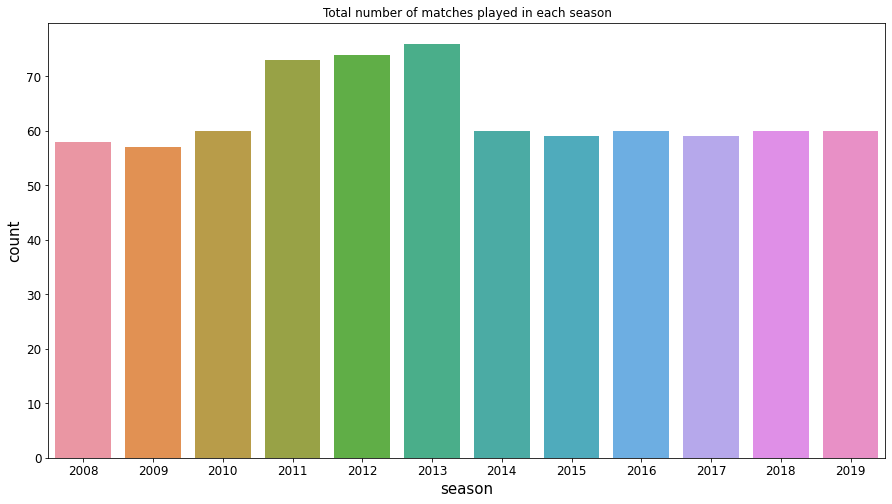

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Total number of matches played in each season")
plt.xlabel('Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=match_ds['season'])# ploting Total number of matches played in each season

## Most Successfull Team in IPL(2008 - 2019)

In [ ]:
matches_won = match_ds.groupby("winner")[["id"]].count() #grouping each team with no. of winning matches
matches_won = matches_won.sort_values(by=["id"],ascending=False).reset_index() # arrange in descending order
matches_won.rename(columns = {'id':'No.of matches Won','winner':'Team'},inplace=True) #renameing the columns
matches_won # displaying ipl teams with No. of matches won

,Team,No.of matches Won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


 >## The MUMBAI INDIANS won the most matches in the IPL, followed by the CHENNAI SUPER KINGS and KOLKATA KNIGHT RIDERS.

### Calculating the Winning Rate

<BarContainer object of 13 artists>

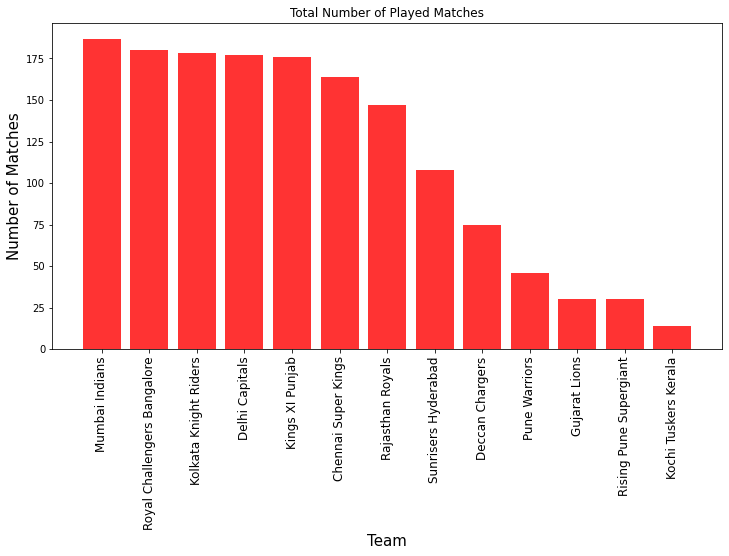

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Total Number of Played Matches")
plt.xlabel("Team",fontsize=15)
plt.ylabel("Number of Matches",fontsize=15)
a = match_ds.groupby(["team1"])['team2'].count() #getting no. of match played by each team as team1
b = match_ds.groupby(['team2'])['team1'].count() #getting no. of match played by each team as team2
matches_played = pd.DataFrame(a+b) # adding both dataframe to get toal no. of matches played by each team as both team1 and team2
matches_played["Team"] = matches_played.index #assinging team names in new column "Team"
matches_played.rename(columns={0:'No. of Matches played'},inplace=True)
plt.xticks(rotation = 90,fontsize=12) #displaying the xticks value in vertical algin
plt.yticks(fontsize=10)
matches_played = matches_played.sort_values('No. of Matches played',ascending=False)
plt.bar(matches_played['Team'],matches_played['No. of Matches played'],alpha = 0.8,color='r')  # alpha -> transperancy levels of bar

In [ ]:
mergerd_df = matches_played.merge(matches_won,on='Team') # merging two dataframe based on "Team" -> team name 
mergerd_df['Win_Rate'] = (mergerd_df['No.of matches Won']/mergerd_df['No. of Matches played'])*100 # calculating winning rate 
mergerd_df.sort_values(by='Win_Rate',ascending=False)

,No. of Matches played,Team,No.of matches Won,Win_Rate
5,164,Chennai Super Kings,100,60.975610
0,187,Mumbai Indians,109,58.288770
7,108,Sunrisers Hyderabad,58,53.703704
2,178,Kolkata Knight Riders,92,51.685393
6,147,Rajasthan Royals,75,51.020408
11,30,Rising Pune Supergiant,15,50.000000
1,180,Royal Challengers Bangalore,84,46.666667
4,176,Kings XI Punjab,82,46.590909
3,177,Delhi Capitals,77,43.502825
10,30,Gujarat Lions,13,43.333333


### According to the above table, CHENNAI SUPER KINGS has the highest winning rate, followed by MUMBAI INDIANS.

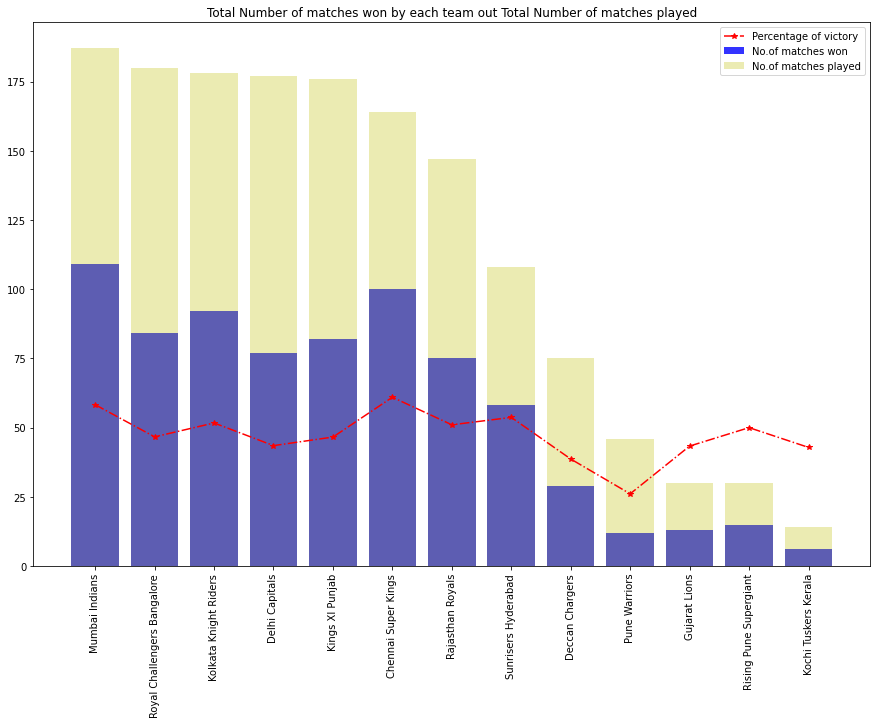

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Total Number of matches won by each team out Total Number of matches played")
plt.xticks(rotation=90,fontsize=10)
plt.bar(mergerd_df['Team'],mergerd_df['No.of matches Won'],color='blue',alpha=.8)
plt.bar(mergerd_df['Team'],mergerd_df['No. of Matches played'],color='y',alpha=0.3)
plt.plot(mergerd_df['Win_Rate'],'r-.*')
plt.legend(['Percentage of victory','No.of matches won','No.of matches played'])

## Considering both bar charts, 
## Chennai Super Kings and  MUMBAI INDIANS are the two most successful teams in IPL history (2008 - 2019)
<hr style="border:2px solid gray">

## Most Successful Players in IPL(2008 - 2019)

### Analyzing <b>Man of the Match</b> players

In [ ]:
man_of_the_match = match_ds.groupby('player_of_match')[['id']].count() #getting the list of 'man of the match' players
man_of_the_match = man_of_the_match.sort_values(by='id',ascending=False).reset_index().head(15)# arranging it in descending order and filter out top 15 players
man_of_the_match.rename(columns ={ 'player_of_match':'Top Players','id':'The number of times a player has been chosen as the man of the match'},inplace=True)
man_of_the_match

,Top Players,The number of times a player has been chosen as the man of the match
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


<AxesSubplot:title={'center':'The number of times a player has been chosen as the man of the match'}, xlabel='The number of times a player has been chosen as the man of the match', ylabel='Top Players'>

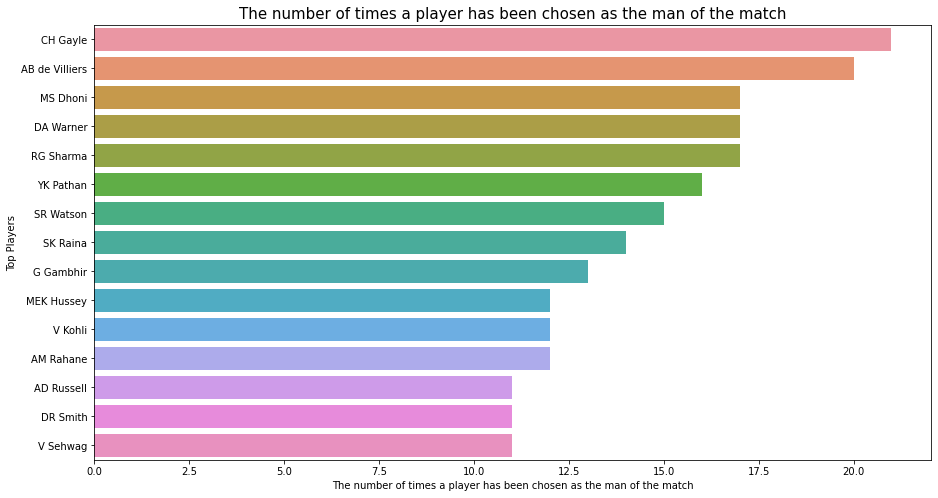

In [ ]:
plt.figure(figsize=(15,8))
plt.title('The number of times a player has been chosen as the man of the match',size=15)
sns.barplot(y=man_of_the_match['Top Players'],x= man_of_the_match['The number of times a player has been chosen as the man of the match'])

### Based on this data, we can conclude that 'CH Gayle,' 'AB de Villiers,' 'MS Dhoni,' 'DA Warner,' 'RG Sharma,' SK Raina, and 'V Kohli' are the most important players in IPL history.

In [ ]:
Batsman = delivery_ds.groupby('batsman')[['batsman_runs']].sum() # total no.of rus scored by each player calculated from "batsman_runs" column
Batsman = Batsman.sort_values(by='batsman_runs',ascending=False).head(15).reset_index() # Arranging in descending order and slicing the top 15 batsman
Batsman.rename(columns={'	batsman_runs':'Runs_scored'},inplace=True)
Batsman

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


<AxesSubplot:title={'center':'Total Runs scored by players'}, xlabel='batsman_runs', ylabel='batsman'>

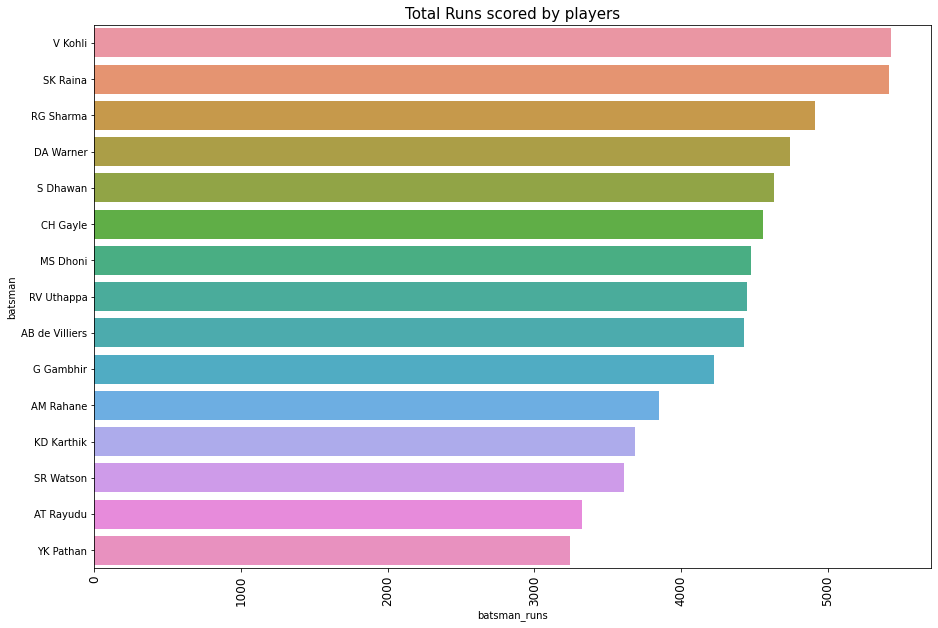

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Runs scored by players',fontsize=15)
sns.barplot(y=Batsman.batsman,x=Batsman.batsman_runs)

### According to the above chart, V Kohli, SK Raina, RG Sharma, DA Warner, S Dhawan, MS Dhoni, AB de Villiers, RV Uthappa, and CH Gayle have the most Run Scorers in IPL history.

## We can conclude from the above two bar charts that 
# Ms Dhoni, AB de Villiers, RG Sharma, and V Kohli are the most successful IPL players (2008 - 2019)
<hr style="border:2px solid gray">

## The "Toss Decision" is the most important factor that contributes to a team's victory or loss.

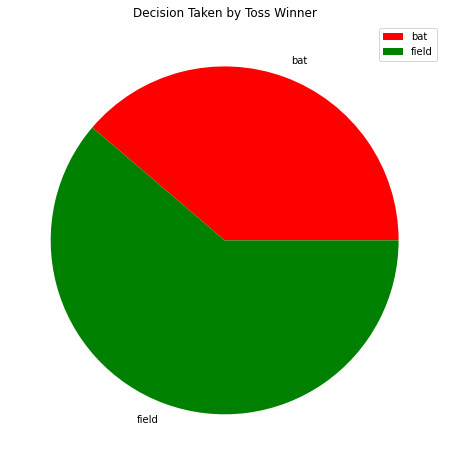

In [ ]:
plt.figure(figsize=(10,8))
toss = [match_ds['toss_decision'].value_counts().bat,match_ds['toss_decision'].value_counts().field]# counting toss winner's decision
plt.pie(toss,labels=['bat','field'],colors=['red','green'])
plt.title('Decision Taken by Toss Winner')
plt.legend()

### We can deduce from the pie chart that the majority of the team prefers to Field rather than Bat.

#### Creating a new Dataframe with toss winner and toss decision columns

In [ ]:
toss_match_winner_df = match_ds[match_ds['toss_winner']==match_ds['winner']] # generating dataframe where the toss winner and match winner are same
toss_match_winner_df = toss_match_winner_df[toss_match_winner_df.result != 'tie'] # make sure the match result does not tie
toss_match_winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
team_winning_toss_df = match_ds.groupby(['team1']).apply(lambda x:x['toss_decision'].count()).reset_index(name = 'No.of times the team won both toss and match')
team_winning_toss_df # grouping team1 from team_winning_toss_df by toss decision

,team1,No.of times the team won both toss and match
0,Chennai Super Kings,89
1,Deccan Chargers,43
2,Delhi Capitals,78
3,Gujarat Lions,14
4,Kings XI Punjab,91
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,83
7,Mumbai Indians,101
8,Pune Warriors,20
9,Rajasthan Royals,67


### We can deduce from the preceding table that Mumbai Indians made the better toss decision.

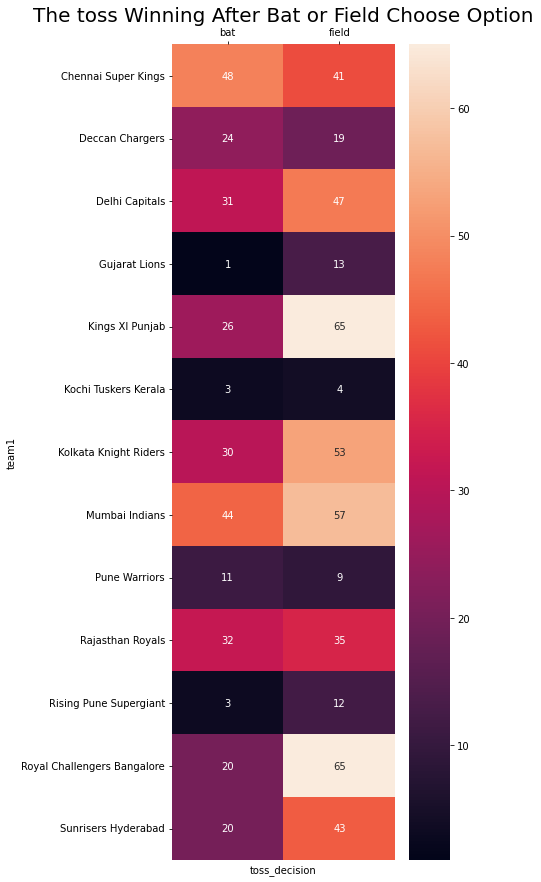

In [ ]:
team_winning_toss_df = match_ds.groupby(['team1','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name = 'toss decision counts')
# slightly modifying it by grouping under toss decision
heatmap_for_data = pd.pivot_table(team_winning_toss_df, values = 'toss decision counts',
                                 index = ['team1'],
                                 columns = 'toss_decision')
# generating heatmap
fig_plt,axis = plt.subplots(1,1,figsize = (5,15))
heat_map_lead = sns.heatmap(heatmap_for_data,annot =True) 
heat_map_lead.xaxis.set_ticks_position("top") # position for ticks
axis.set_title("The toss Winning After Bat or Field Choose Option",size = 20);

### We can deduce what each team's strength is based on this heatmap, whether it was Bat or Field.
<hr style="border:2px solid gray">

### The 'Location of the Match' is another important factor that contributes to a team's victory or loss.

In [ ]:
Location = match_ds.groupby('city')[['winner']].count() #grouping no. of winner in every city  
Location=Location.sort_values(by='winner',ascending=False).reset_index()
Location.rename(columns={'city':'Location','winner':'No. of matches held in the city'},inplace=True)
Location

,Location,No. of matches held in the city
0,Mumbai,101
1,Kolkata,77
2,Delhi,73
3,Bangalore,64
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


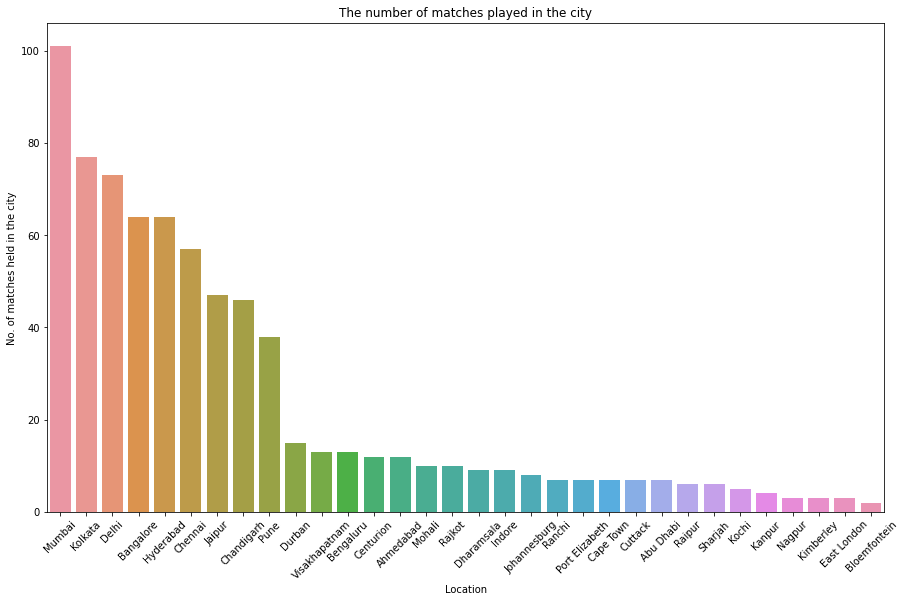

In [ ]:
plt.figure(figsize=(15,9))
plt.xticks(fontsize=10,rotation=45)
plt.title("The number of matches played in the city")
sns.barplot(y = Location['No. of matches held in the city'],x=Location.Location)

## Thisbar graph indicates that the most important cities for IPL matches are MUMBAI, KOLKATA, DELHI, BANGALORE, HYDERABAD, and CHENNAI.Every team must prepare for a game in this major city and at a significant stadium.
<hr style="border:2px solid gray">

## RESULT:
   > ## CHENNAI SUPER KINGS and MUMBAI INDIANS are the most successful teams in IPL history.
   > ## MS Dhoni, AB de Villiers, RG Sharma, and V Kohli are the most successful players in IPL history.
   > ## The Toss decision and City in which the game was played are two major factors that contibute to a team's victory and defect.
   > ## I would recommend that a company to choose "MS DHONI," "V KOHLI," and "RG Sharma" to support its products because of their large fan bases .

## **Thank You**